In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s /content/drive/MyDrive /mygdrive

Mounted at /content/drive


In [2]:
!ls /mygdrive

'Colab Notebooks'   CS1


# importing libraries

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import os
import datetime as dt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import pickle
import random

# loading models

In [4]:
data_path = "/mygdrive/CS1/data/"

with open("/mygdrive/CS1/LR_L1_reg.pkl", "rb") as f: 
  model = pickle.load(f)

with open("/mygdrive/CS1/x_scaler.pkl", "rb") as f: 
  x_scaler = pickle.load(f)

with open("/mygdrive/CS1/y_scaler.pkl", "rb") as f: 
  y_scaler = pickle.load(f)


# loading data

In [10]:
df_test = pd.read_csv(data_path + "test_features_only.csv", parse_dates = True)
df_test["Date"] = pd.to_datetime(df_test["Date"], format = "%Y-%m-%d")
df_test.sort_values(by = ["Date"], inplace = True)
df_test.head(2)

,Date,Close,(H-L)*100/L,PE_NIFTY50,crude close,crude (H-L)*100/L,gold close,gold (H-L)*100/L,euronext close,euronext (H-L)*100/L,nasdaq close,nasdaq (H-L)*100/L,sp500 close,sp500 (H-L)*100/L,treasury close,treasury (H-L)*100/L,usd_inr close,usd_inr (H-L)*100/L,(C-O)*100/O,crude (C-O)*100/O,gold (C-O)*100/O,euronext (C-O)*100/O,nasdaq (C-O)*100/O,sp500 (C-O)*100/O,treasury (C-O)*100/O,usd_inr (C-O)*100/O,(O2-O1)*100/O1,(C2-C1)*100/C1,(O2-C1)*100/C1,crude (O2-O1)*100/O1,crude (C2-C1)*100/C1,crude (O2-C1)*100/C1,gold (O2-O1)*100/O1,gold (C2-C1)*100/C1,gold (O2-C1)*100/C1,euronext (O2-O1)*100/O1,euronext (C2-C1)*100/C1,euronext (O2-C1)*100/C1,nasdaq (O2-O1)*100/O1,nasdaq (C2-C1)*100/C1,nasdaq (O2-C1)*100/C1,sp500 (O2-O1)*100/O1,sp500 (C2-C1)*100/C1,sp500 (O2-C1)*100/C1,treasury (O2-O1)*100/O1,treasury (C2-C1)*100/C1,treasury (O2-C1)*100/C1,usd_inr (O2-O1)*100/O1,usd_inr (C2-C1)*100/C1,usd_inr (O2-C1)*100/C1,output
0,2018-11-02,10553.0,1.427178,25.40,72.830002,1.815166,1230.900024,0.194981,991.010010,1.159516,7356.990234,2.299725,2723.060059,2.077814,3.214,1.933439,73.309998,1.058907,0.866924,0.233964,-0.194602,-0.883143,-0.902877,-0.815527,1.870048,0.31541,0.197282,1.662257,0.788498,-3.761584,-3.536421,-3.761584,1.472768,-0.412619,-0.218443,1.612860,0.361542,1.255775,1.312808,-1.036712,-0.135055,1.025540,-0.631669,0.185370,-0.284450,2.226463,0.349873,-1.337251,-1.026059,-1.337251,10524.0
1,2018-11-05,10524.0,0.780756,25.33,73.169998,2.616641,1229.800049,0.391298,989.440002,0.533989,7328.850098,1.286544,2738.310059,0.968751,3.201,0.596359,72.904999,1.238390,-0.329111,0.577317,-0.065003,-0.169505,-0.207378,0.437943,-0.062441,0.00000,0.921883,-0.274803,0.054487,0.123859,0.466835,-0.109848,-0.218931,-0.089363,-0.024376,-0.872143,-0.158425,0.011098,-1.076774,-0.382495,-0.175481,-0.694962,0.560032,0.121557,1.521395,-0.404480,-0.342253,-0.238780,-0.552447,-0.552447,10530.0


In [11]:
df_test.tail(2)

,Date,Close,(H-L)*100/L,PE_NIFTY50,crude close,crude (H-L)*100/L,gold close,gold (H-L)*100/L,euronext close,euronext (H-L)*100/L,nasdaq close,nasdaq (H-L)*100/L,sp500 close,sp500 (H-L)*100/L,treasury close,treasury (H-L)*100/L,usd_inr close,usd_inr (H-L)*100/L,(C-O)*100/O,crude (C-O)*100/O,gold (C-O)*100/O,euronext (C-O)*100/O,nasdaq (C-O)*100/O,sp500 (C-O)*100/O,treasury (C-O)*100/O,usd_inr (C-O)*100/O,(O2-O1)*100/O1,(C2-C1)*100/C1,(O2-C1)*100/C1,crude (O2-O1)*100/O1,crude (C2-C1)*100/C1,crude (O2-C1)*100/C1,gold (O2-O1)*100/O1,gold (C2-C1)*100/C1,gold (O2-C1)*100/C1,euronext (O2-O1)*100/O1,euronext (C2-C1)*100/C1,euronext (O2-C1)*100/C1,nasdaq (O2-O1)*100/O1,nasdaq (C2-C1)*100/C1,nasdaq (O2-C1)*100/C1,sp500 (O2-O1)*100/O1,sp500 (C2-C1)*100/C1,sp500 (O2-C1)*100/C1,treasury (O2-O1)*100/O1,treasury (C2-C1)*100/C1,treasury (O2-C1)*100/C1,usd_inr (O2-O1)*100/O1,usd_inr (C2-C1)*100/C1,usd_inr (O2-C1)*100/C1,output
679,2021-08-09,16258.250000,0.875825,26.53,69.040001,3.62372,1723.400024,3.615743,1314.209961,0.322520,14860.179688,0.548003,4432.350098,0.331091,1.317,4.416404,74.491402,0.451694,-0.141878,-1.455891,-1.716565,0.200522,0.029752,-0.122132,3.051643,-0.000133,-0.141378,0.123473,0.265728,-1.683980,-2.347944,-0.905232,-2.572511,-2.079544,-0.369318,0.289028,0.182946,-0.017541,-0.056915,0.164602,0.134809,0.196434,-0.093991,0.028175,2.076677,2.093023,-0.930233,0.562812,0.552632,0.552766,16280.099609
680,2021-08-10,16280.099609,0.969001,26.35,70.629997,3.27679,1728.800049,0.877854,1319.800049,0.481522,14788.089844,0.949745,4436.750000,0.342665,1.342,2.820122,74.466202,0.439565,0.032564,1.933895,0.011574,0.220216,-0.669410,0.021641,1.666667,0.000000,-0.040229,0.134391,0.101793,-1.099054,2.303007,0.362109,-1.420018,0.313336,0.301726,0.405623,0.425357,0.204691,0.215339,-0.485121,0.185531,-0.044617,0.099268,0.077610,3.286385,1.898254,0.227790,-0.033962,-0.033829,-0.033829,16282.250000


# utility functions

In [12]:
# Reference: https://github.com/Shagun-25/Nifty-Index-Prediction-Using-News-Sentiments/blob/master/Pipeline.ipynb

def single_day_prediction(date): 
  '''
  Given a date this function tries to predict the
  closing value of next day's NIFTY 50 index
  '''
  present_day = df_test[df_test['Date'] == date]
  if present_day.shape[0] == 1: 
    x = present_day.values[0, 1 : -1].reshape(1, -1)
    x_scaled = x_scaler.transform(x)
    
    y_pred_scaled = model.predict(x_scaled)
    y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(1, -1))
    
    print("Actual closing index value for next working day is:", present_day.values[0, -1])
    print("Predicted closing index value for next working day is:", y_pred[0, 0])
  
  else:
    print("Please enter a non-stock market holiday date between \'2018-11-02\' and \'2021-08-10\' in \'YYYY-MM-DD format")

def multiple_days_prediction(): 
  
  # randomly selecting a row
  n = random.sample(range(df_test.shape[0] - 60), 1)[0]
  
  x = df_test.values[n : n+60, 1 : -1]
  x_scaled = x_scaler.transform(x)
  y_true = df_test.values[n : n+60, -1]
  
  y_pred_scaled = model.predict(x_scaled)
  
  y_pred = y_scaler.inverse_transform(y_pred_scaled)
  print("RMSE:", mean_squared_error(y_true, y_pred, squared = False))

  plt.figure(figsize = (10, 5))
  plt.plot(df_test.iloc[n : n+60, 0], y_true, "b.-", label = "original")
  plt.plot(df_test.iloc[n : n+60, 0], y_pred, "r.-", label = "predicted")
  plt.legend()
  plt.xlabel("Date")
  plt.ylabel("Index Value")
  plt.title("NIFTY 50 index prediction for 60 consecutive days")
  plt.grid()
  plt.show()


# single day prediction

In [13]:
%%time
single_day_prediction("2018-11-04")

Please enter a non-stock market holiday date between '2018-11-02' and '2021-08-10' in 'YYYY-MM-DD format
CPU times: user 3.37 ms, sys: 1.08 ms, total: 4.45 ms
Wall time: 5.79 ms


In [14]:
%%time
single_day_prediction("2018-11-05")

Actual closing index value for next working day is: 10530.0
Predicted closing index value for next working day is: 10520.252086858969
CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.42 ms


# multiple days prediction

RMSE: 70.72937067374113


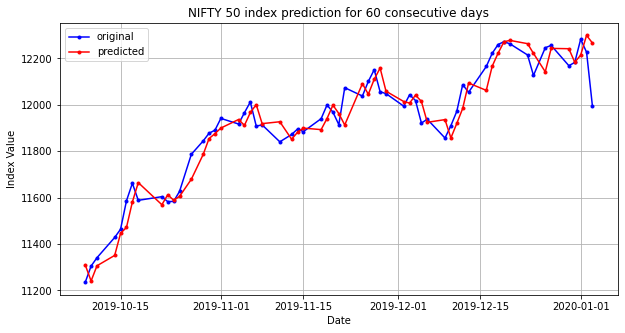

CPU times: user 213 ms, sys: 8.35 ms, total: 222 ms
Wall time: 223 ms


In [22]:
%%time
multiple_days_prediction()